In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mplmpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### The normal equation

In [4]:
import numpy as np

np.random.seed(42)
m =100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

TypeError: 'bool' object is not callable

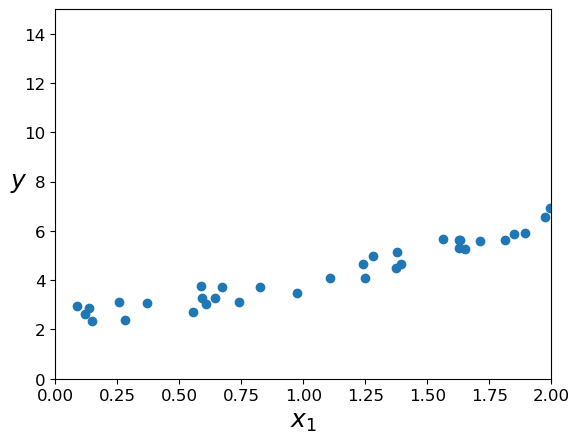

In [78]:
plt.scatter(X, y)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.grid(True)

In [22]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.51359766],
       [2.98323418]])

In [2]:
import numpy as np

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


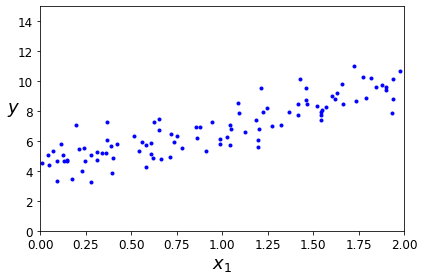

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [43]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.51359766],
       [10.48006601]])

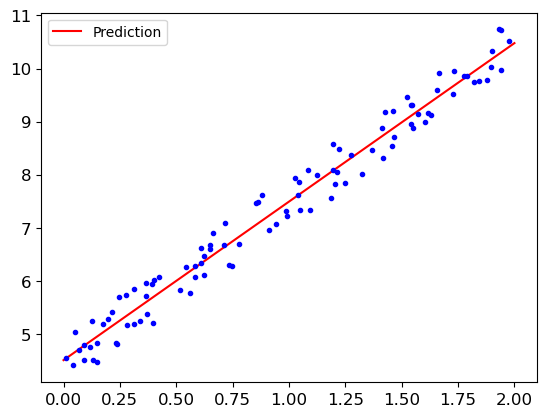

In [48]:
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.plot(X, y, "b.")
plt.legend()
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

### batch gradient descent

In [61]:
eta = 0.1 # learning rate
n_epochs = 1000 # Each iteration over the training set is called an epoch
m = len(X_b) # number of instances

np.random.seed(42)
# randn -> Return a sample (or samples) from the “standard normal” distribution
theta = np.random.randn(2, 1) # randomly initialised model parameters

for i in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [54]:
theta

array([[4.51359766],
       [2.98323418]])

In [60]:
theta

array([[4.51359766],
       [2.98323418]])

### Stochastic Gradient Descent

In [63]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(42)
theta = np.random.rand(2,1)

for epoch in range(n_epochs):     
    for iteration in range(m):         
        random_index = np.random.randint(m)         
        xi = X_b[random_index : random_index + 1]         
        yi = y[random_index : random_index + 1]         
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m         
        eta = learning_schedule(epoch * m + iteration)         
        theta = theta - eta * gradients

In [64]:
theta

array([[4.51519945],
       [2.97776947]])

### SGD regressor

In [70]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets and ravel convert it into 1D
sgd_reg.intercept_, sgd_reg.coef_

(array([4.50316965]), array([2.99156535]))

### Polynomial Regression

In [88]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m ,1)

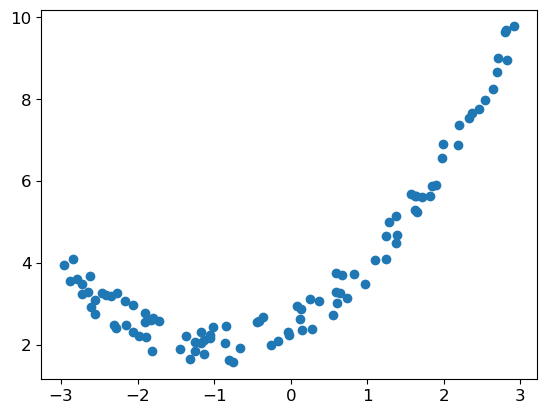

In [89]:
plt.scatter(X, y)

In [90]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [83]:
X_poly[0] # X_poly now contains the original feature of X plus the square of this feature, which presents 0.5 * . X ** 2 + X

array([-0.75275929,  0.56664654])

In [95]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49786712]), array([[0.9943591 , 0.49967213]]))

### learning curves

Text(0.5, 0, 'training set size')

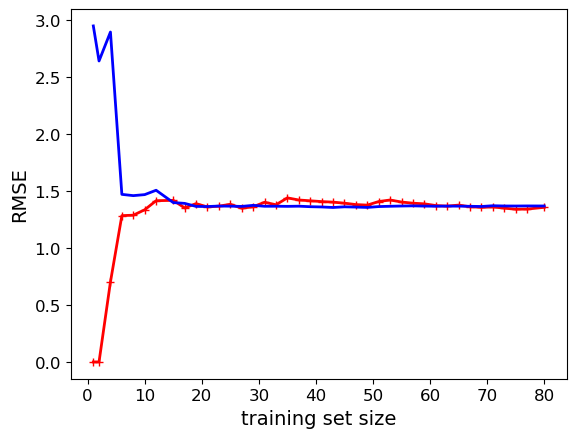

In [125]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_scores = -train_scores.mean(axis=1)
valid_scores = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_scores, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_scores, "b-", linewidth=2, label="valid")
plt.ylabel("RMSE")
plt.xlabel("training set size")